Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).

Make sure that in addition to the code, you provide written answers for all questions of the assignment. 

Below, please fill in your name:

In [1]:
NAME = "Bahauddin Kalyani"

## Assignment 1 - Data Cleaning & Visualization
**(30 points total)**

For this assignment, we will use an open dataset with data on various types of cereal and the corresponding customer ratings. Use the .csv file provided.

Create a dataframe by importing the file into Jupyter, and complete the tasks below. Be sure to show your Python code. You will not be graded on code efficiency, but your code should return a correct answer.

**Question 1.**  _(4 points)_
* Create a new 'Type of Cereal' column in your dataframe (1 point) by copying the 'name' column. Write a function to replace the names of the cereal in your new column with one of these categories Bran, Wheat, Fiber, Protein, Crunch, Corn, Nut, Rice and Other (3 points). Hint: the function should look through the text in the cereal name and determine, based on its contents, how to categorize the cereal type.

**Question 2.**  _(2 points)_
* Identify the negative values in the data set and replace them with the median value for that column. 

**Question 3.** _(5 points)_
* Standardize the 'weight' column to 1. For this question, you will need to write a function to divide the remaining columns which contain nutritional information by the corresponding value in the weight column, and you will need to divide the value in the weight column by itself in order to get 1. For example, if an observation has a weight value of 1.33 and a calories value of 250, if you divide 250/1.33 you should get a calories value of 188 and a weight value of 1. 

**Question 4.**  _(5 points)_
* Create a new column to categorize cereals as 'healthy' vs. 'unhealthy'. You can define your own version of healthy vs. unhealthy, or you can use the following: healthy cereals can be defined as those which have low calories (<100), low sodium (<150), low sugar (<9) high fiber (>3), and high protein (>2). All other cereals are unhealthy.

**Question 5.** _(2 points)_
* Based on your newly prepared data set, identify what % of cereals that each manufacturer produces are healthy.

**Question 6.** _(2 points)_
* Calculate the average, minimum and maximum ratings for healthy vs. unhealthy cereals.

**Question 7.** _(2 points)_
* Calculate the average, minimum and maximum ratings for each type of cereal: Bran, Wheat, Fiber, Protein, Crunch, Corn, Nut, Rice and Other.

**Question 8.** _(3 points)_
* Create a stacked bar chart which shows how many of each type of cereal each manufacturer produces.

**Question 9.** _(3 points)_
* Create a 3-dimensional scatterplot which shows the relationship between rating and calories; the 3-rd dimension should be reflected in the color of the dots and should highlight whether the cereal is categorized as healthy or unhealthy. 

**Question 10.** _(1 point)_
* Which shelf has the most healthy cereals?

**Question 11.** _(1 point)_
* Based on the analysis conducted, what can you conclude about the cereal data set?

---

**Loading Data and Basic EDA**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('cereal.csv')
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [4]:
df.shape

(77, 16)

In [5]:
df.isna().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

In [6]:
df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


* created the data frame from given csv file.
* checked for null values and did basic EDA

---

**Question 1.**  _(4 points)_
* Create a new 'Type of Cereal' column in your dataframe (1 point) by copying the 'name' column. Write a function to replace the names of the cereal in your new column with one of these categories Bran, Wheat, Fiber, Protein, Crunch, Corn, Nut, Rice and Other (3 points). Hint: the function should look through the text in the cereal name and determine, based on its contents, how to categorize the cereal type.

In [7]:
def categorize_cereal(row):
    name = row['name'].lower()
    contents = ['bran', 'wheat', 'fiber', 'protein', 'crunch', 'corn', 'nut', 'rice']
    
    for content in contents:
        if content in name:
            return content.capitalize()
    
    return 'Other'

In [8]:
df['cereal_type'] = df.apply(categorize_cereal, axis=1)
df.head(10)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,cereal_type
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,68.402973,Bran
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.00,1.00,33.983679,Bran
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.00,0.33,59.425505,Bran
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50,93.704912,Bran
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.00,0.75,34.384843,Other
5,Apple Cinnamon Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1.00,0.75,29.509541,Other
6,Apple Jacks,K,C,110,2,0,125,1.0,11.0,14,30,25,2,1.00,1.00,33.174094,Other
7,Basic 4,G,C,130,3,2,210,2.0,18.0,8,100,25,3,1.33,0.75,37.038562,Other
8,Bran Chex,R,C,90,2,1,200,4.0,15.0,6,125,25,1,1.00,0.67,49.120253,Bran
9,Bran Flakes,P,C,90,3,0,210,5.0,13.0,5,190,25,3,1.00,0.67,53.313813,Bran


**Answer 1.**
* created a function that returns the type of the cererla based on its name. and applied thatfunction to whole Dataframe using pandas .apply() method.

---

**Question 2.**  _(2 points)_
* Identify the negative values in the data set and replace them with the median value for that column. 

In [9]:
def replace_negative_with_median(column):
    if column.name not in ['name', 'mfr', 'type', 'cereal_type']:
        column_median = column[column >= 0].median()
        column[column < 0] = column_median
    return column

def count_negative(df):
    df_numeric = df.drop(['name', 'mfr', 'type', 'cereal_type'], axis=1).copy()
    negative_count = (df_numeric < 0).sum().sum()
    print(negative_count)

In [10]:
count_negative(df)

4


In [11]:
df = df.apply(replace_negative_with_median, axis=0)

In [12]:
count_negative(df)

0


In [13]:
df.head(10)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,cereal_type
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,68.402973,Bran
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.00,1.00,33.983679,Bran
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.00,0.33,59.425505,Bran
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50,93.704912,Bran
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,90,25,3,1.00,0.75,34.384843,Other
5,Apple Cinnamon Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1.00,0.75,29.509541,Other
6,Apple Jacks,K,C,110,2,0,125,1.0,11.0,14,30,25,2,1.00,1.00,33.174094,Other
7,Basic 4,G,C,130,3,2,210,2.0,18.0,8,100,25,3,1.33,0.75,37.038562,Other
8,Bran Chex,R,C,90,2,1,200,4.0,15.0,6,125,25,1,1.00,0.67,49.120253,Bran
9,Bran Flakes,P,C,90,3,0,210,5.0,13.0,5,190,25,3,1.00,0.67,53.313813,Bran


**Answer 2.**
* Created a function which checks if the value is negative column by column and if negative value found then it replaces it with median value of the column

---

**Question 3.** _(5 points)_
* Standardize the 'weight' column to 1. For this question, you will need to write a function to divide the remaining columns which contain nutritional information by the corresponding value in the weight column, and you will need to divide the value in the weight column by itself in order to get 1. For example, if an observation has a weight value of 1.33 and a calories value of 250, if you divide 250/1.33 you should get a calories value of 188 and a weight value of 1. 

In [14]:
def categorize_cereal(row):
    weight = row.weight
    nutri_columns = ['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 
                     'sugars', 'potass', 'weight', 'vitamins', 'cups']
    for column in nutri_columns:
            row[column] = row[column] / weight
    return row

In [15]:
df = df.apply(categorize_cereal, axis=1)

In [16]:
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,cereal_type
0,100% Bran,N,C,70.0,4.0,1.0,130.0,10.0,5.0,6.0,280.0,25.0,3,1.0,0.33,68.402973,Bran
1,100% Natural Bran,Q,C,120.0,3.0,5.0,15.0,2.0,8.0,8.0,135.0,0.0,3,1.0,1.00,33.983679,Bran
2,All-Bran,K,C,70.0,4.0,1.0,260.0,9.0,7.0,5.0,320.0,25.0,3,1.0,0.33,59.425505,Bran
3,All-Bran with Extra Fiber,K,C,50.0,4.0,0.0,140.0,14.0,8.0,0.0,330.0,25.0,3,1.0,0.50,93.704912,Bran
4,Almond Delight,R,C,110.0,2.0,2.0,200.0,1.0,14.0,8.0,90.0,25.0,3,1.0,0.75,34.384843,Other


**Answer 3.**
* To normalize the weight I have written a fucntion which parse the DataFrame row by row and parse over the nutrition columns and divide each values by weight.

---

**Question 4.**  _(5 points)_
* Create a new column to categorize cereals as 'healthy' vs. 'unhealthy'. You can define your own version of healthy vs. unhealthy, or you can use the following: healthy cereals can be defined as those which have low calories (<100), low sodium (<150), low sugar (<9) high fiber (>3), and high protein (>2). All other cereals are unhealthy.

In [17]:
def categorize_cereal_healthy_unhealthy(row):
    if (row.calories <= 110) and (row.sodium <= 200) and (row.sugars <= 9) and (row.fiber >= 2) and (row.protein >= 2):
        return 'Healthy'
    else:
        return 'Unhealthy'

In [18]:
df['health_status'] = df.apply(categorize_cereal_healthy_unhealthy, axis=1)
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,cereal_type,health_status
0,100% Bran,N,C,70.0,4.0,1.0,130.0,10.0,5.0,6.0,280.0,25.0,3,1.0,0.33,68.402973,Bran,Healthy
1,100% Natural Bran,Q,C,120.0,3.0,5.0,15.0,2.0,8.0,8.0,135.0,0.0,3,1.0,1.00,33.983679,Bran,Unhealthy
2,All-Bran,K,C,70.0,4.0,1.0,260.0,9.0,7.0,5.0,320.0,25.0,3,1.0,0.33,59.425505,Bran,Unhealthy
3,All-Bran with Extra Fiber,K,C,50.0,4.0,0.0,140.0,14.0,8.0,0.0,330.0,25.0,3,1.0,0.50,93.704912,Bran,Healthy
4,Almond Delight,R,C,110.0,2.0,2.0,200.0,1.0,14.0,8.0,90.0,25.0,3,1.0,0.75,34.384843,Other,Unhealthy


**Answer 4.**
* Created a function to categorize the health status of the cereal which parse the DataFrame row by row and retuns the heath status which I am saving it in health_status column.

---

**Question 5.** _(2 points)_
* Based on your newly prepared data set, identify what % of cereals that each manufacturer produces are healthy.

In [19]:
df_copy = df.copy()

In [20]:
result = (df_copy[df_copy['health_status'] == 'Healthy'].groupby('mfr').size() / df_copy.groupby('mfr').size()) * 100
result = result.rename('healthy_percentage').reset_index()
result

,mfr,healthy_percentage
0,A,NaN
1,G,18.181818
2,K,30.434783
3,N,83.333333
4,P,33.333333
5,Q,50.000000
6,R,12.500000


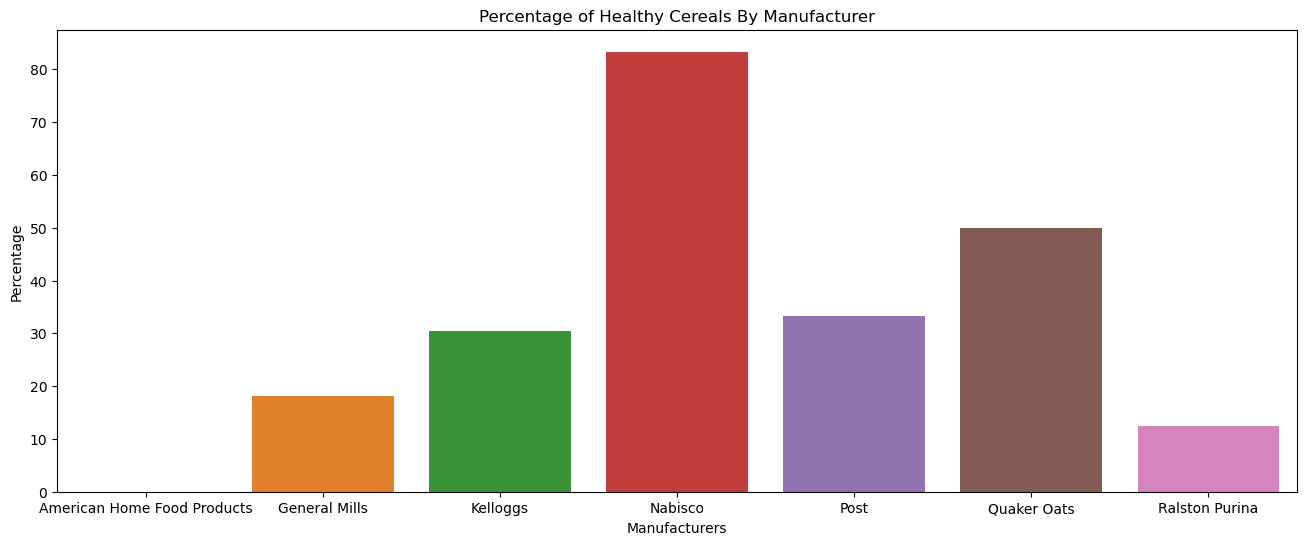

In [21]:
plt.figure(figsize=(16, 6))
sns.barplot(x=result['mfr'], y=result['healthy_percentage'])
plt.xlabel("Manufacturers")
plt.ylabel("Percentage")
plt.title("Percentage of Healthy Cereals By Manufacturer")
plt.gca().set_xticklabels(['American Home Food Products','General Mills','Kelloggs',
     'Nabisco','Post','Quaker Oats','Ralston Purina'])
plt.show()

**Answer 5.**
* 83.33% of the cereals produced by Nabisco are classified as healthy.
* None of the cerelas produced by American Home Food Products are healthy.
* Quaker Oats is the second in producing the healthy cerelas of its overall production which is at 50%.

---

**Question 6.** _(2 points)_
* Calculate the average, minimum and maximum ratings for healthy vs. unhealthy cereals.

In [22]:
df_copy = df.copy()
ratings_stats_by_health = df_copy.groupby('health_status')['rating'].agg(['mean', 'min', 'max'])
ratings_stats_by_health

,mean,min,max
health_status,,,
Healthy,54.344662,30.313351,93.704912
Unhealthy,37.377121,18.042851,64.533816


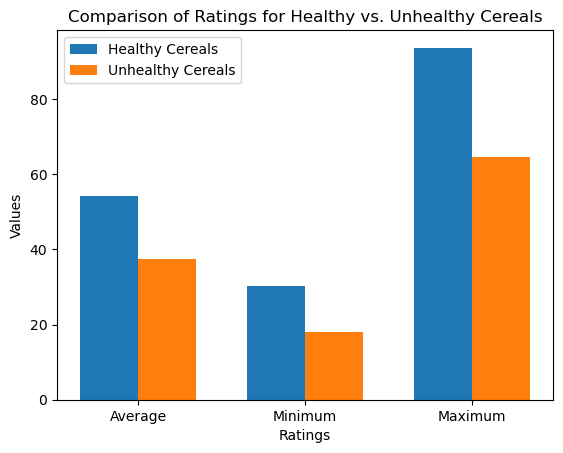

In [23]:
healthy_ratings = [ratings_stats_by_health['mean']['Healthy'],
                   ratings_stats_by_health['min']['Healthy'], 
                   ratings_stats_by_health['max']['Healthy']]
unhealthy_ratings = [ratings_stats_by_health['mean']['Unhealthy'], 
                     ratings_stats_by_health['min']['Unhealthy'], 
                     ratings_stats_by_health['max']['Unhealthy']]


x = np.arange(len(healthy_ratings))
width = 0.35
fig, ax = plt.subplots()

ax.bar(x - width/2, healthy_ratings, width, label='Healthy Cereals')
ax.bar(x + width/2, unhealthy_ratings, width, label='Unhealthy Cereals')

ax.set_xticks(x)
ax.set_xticklabels(['Average', 'Minimum', 'Maximum'])
ax.set_xlabel('Ratings')
ax.set_ylabel('Values')
ax.set_title('Comparison of Ratings for Healthy vs. Unhealthy Cereals')
ax.legend()
plt.show()

**Answer 6.**
* Healthy cereals have a higher mean rating of 54.34, with the highest rating reaching 93.7. On the other hand, unhealthy cereals have a lower mean rating of 37.37, with the lowest rating being 18.04.

---

**Question 7.** _(2 points)_
* Calculate the average, minimum and maximum ratings for each type of cereal: Bran, Wheat, Fiber, Protein, Crunch, Corn, Nut, Rice and Other.

In [24]:
df_copy = df.copy()
ratings_stats_by_type = df_copy.groupby('cereal_type')['rating'].agg(['mean', 'min', 'max'])
ratings_stats_by_type

,mean,min,max
cereal_type,,,
Bran,50.714179,28.592785,93.704912
Corn,40.482720,35.782791,45.863324
Crunch,26.078598,18.042851,36.523683
Nut,42.433500,31.072217,53.371007
Other,37.281694,21.871292,55.333142
Rice,47.771735,40.560159,60.756112
Wheat,56.333863,36.176196,72.801787


In [25]:
mean_ratings = [ratings_stats_by_type['mean']['Bran'],
                ratings_stats_by_type['mean']['Corn'],
                ratings_stats_by_type['mean']['Crunch'],
                ratings_stats_by_type['mean']['Nut'],
                ratings_stats_by_type['mean']['Other'],
                ratings_stats_by_type['mean']['Rice'],
                ratings_stats_by_type['mean']['Wheat']]

min_ratings = [ratings_stats_by_type['min']['Bran'],
                ratings_stats_by_type['min']['Corn'],
                ratings_stats_by_type['min']['Crunch'],
                ratings_stats_by_type['min']['Nut'],
                ratings_stats_by_type['min']['Other'],
                ratings_stats_by_type['min']['Rice'],
                ratings_stats_by_type['min']['Wheat']]

max_ratings = [ratings_stats_by_type['max']['Bran'],
                ratings_stats_by_type['max']['Corn'],
                ratings_stats_by_type['max']['Crunch'],
                ratings_stats_by_type['max']['Nut'],
                ratings_stats_by_type['max']['Other'],
                ratings_stats_by_type['max']['Rice'],
                ratings_stats_by_type['max']['Wheat']]

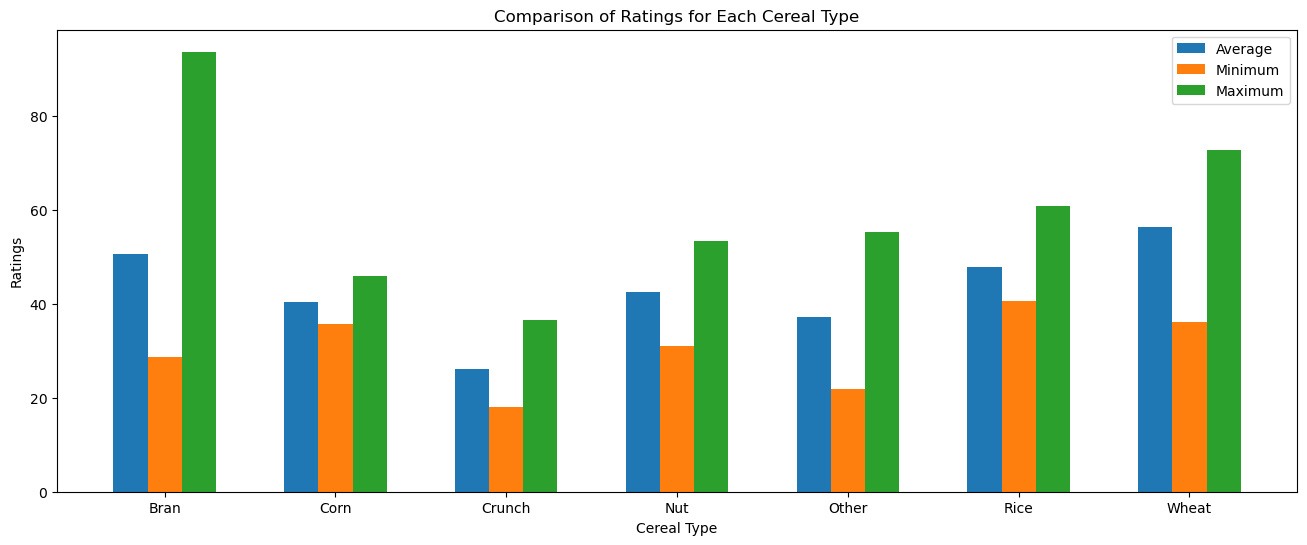

In [26]:
x = np.arange(len(mean_ratings))

# Set the width of the bars
width = 0.2
# Create a figure and axes for the subplots
# plt.figure(figsize=(10, 6))
fig, ax = plt.subplots(figsize=(16, 6))


ax.bar(x - width, mean_ratings, width, label='Average')
ax.bar(x, min_ratings, width, label='Minimum')
ax.bar(x + width, max_ratings, width, label='Maximum')


ax.set_xticks(x)
ax.set_xticklabels(ratings_stats_by_type.index)
ax.set_xlabel('Cereal Type')
ax.set_ylabel('Ratings')
ax.set_title('Comparison of Ratings for Each Cereal Type')
ax.legend()
plt.show()

**Answer 7.**
* Wheat cereals have the highest mean rating of 56.33, with the highest rating reaching 72.80. Bran cereals, on the other hand, have the highest rating of 93.70 with a mean rating of 50.71. Among the cereal types, Crunch cereals have the lowest mean rating of 26.07 and the minimum rating of 18.04.

---

**Question 8.** _(3 points)_
* Create a stacked bar chart which shows how many of each type of cereal each manufacturer produces.

In [27]:
df_copy = df.copy()
manufacturers_cereal_counts = df_copy.groupby(['mfr', 'cereal_type']).size().unstack()
manufacturers_cereal_counts

cereal_type,Bran,Corn,Crunch,Nut,Other,Rice,Wheat
mfr,,,,,,,
A,NaN,NaN,NaN,NaN,1.0,NaN,NaN
G,2.0,1.0,1.0,1.0,14.0,NaN,3.0
K,5.0,2.0,2.0,2.0,9.0,1.0,2.0
N,2.0,NaN,NaN,NaN,NaN,NaN,4.0
P,2.0,NaN,NaN,3.0,4.0,NaN,NaN
Q,1.0,NaN,1.0,NaN,4.0,1.0,1.0
R,1.0,1.0,NaN,NaN,4.0,1.0,1.0


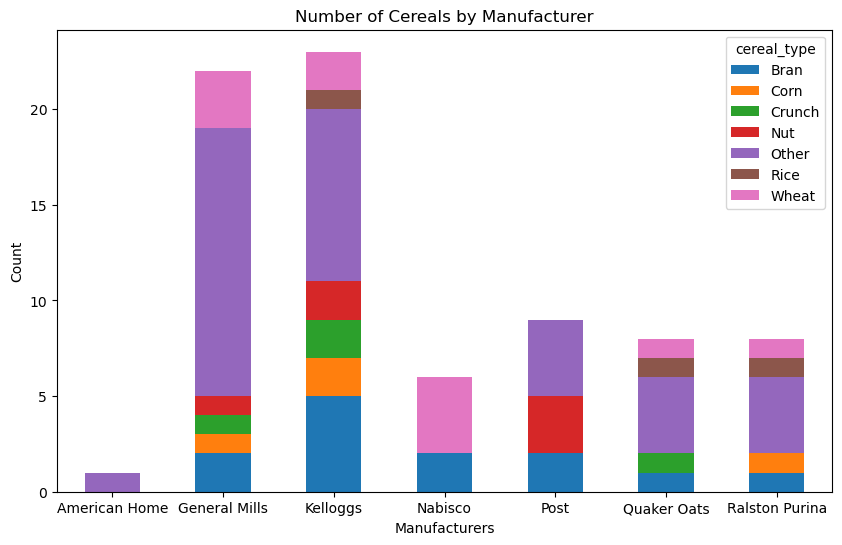

In [28]:
legend_mapping = {
    'A': 'American Home',
    'G': 'General Mills',
    'K': 'Kelloggs',
    'N': 'Nabisco',
    'P': 'Post',
    'Q': 'Quaker Oats',
    'R': 'Ralston Purina'
}


manufacturers_cereal_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
legend_labels = [legend_mapping.get(label, label) for label in manufacturers_cereal_counts.index]
# plt.legend(labels=legend_labels)
x = np.arange(len(manufacturers_cereal_counts))

plt.xlabel('Manufacturers')
plt.ylabel('Count')
plt.xticks(ticks = x, labels = legend_labels, rotation=0)
plt.title('Number of Cereals by Manufacturer')
plt.show()

**Answer 8.**
* Kellogg's produces all types of cereals, with 5 of them being of the Bran type and 9 falling into other categories. On the other hand, General Mills produces 3 types of wheat cereals and a whopping 14 types in other categories.

---

**Question 9.** _(3 points)_
* Create a 3-dimensional scatterplot which shows the relationship between rating and calories; the 3-rd dimension should be reflected in the color of the dots and should highlight whether the cereal is categorized as healthy or unhealthy. 

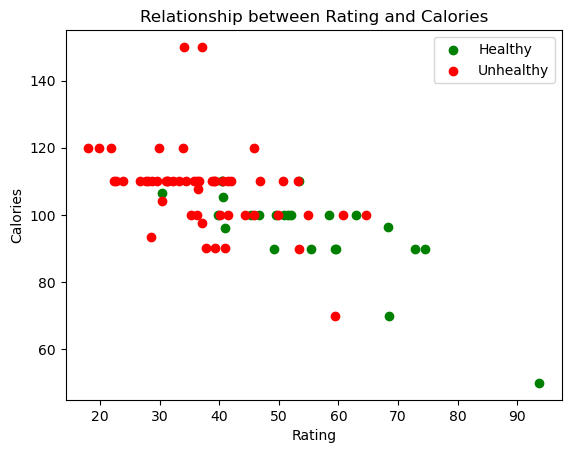

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Define colors for healthy and unhealthy cereals
healthy_color = 'green'
unhealthy_color = 'red'

healthy_cereals = df[df['health_status'] == 'Healthy']
unhealthy_cereals = df[df['health_status'] == 'Unhealthy']

ax.scatter(healthy_cereals['rating'], healthy_cereals['calories'], c=healthy_color, label='Healthy')
ax.scatter(unhealthy_cereals['rating'], unhealthy_cereals['calories'], c=unhealthy_color, label='Unhealthy')

ax.set_xlabel('Rating')
ax.set_ylabel('Calories')
ax.set_title('Relationship between Rating and Calories')
ax.legend()
plt.show()

**Answer 9.**
* Cereals with higher calorie content tend to have lower ratings and are classified as unhealthy. On the other hand, cereals with lower calorie content have higher ratings and are labeled as healthy.

**Note:** 3-dimensional scatterplot does not makes sense in this scenario as we are showing third dimention by color so it makes more sense to drwa it in 2D. Hence drawing it in 2D.

---

**Question 10.** _(1 point)_
* Which shelf has the most healthy cereals?

In [30]:
healthy_cereals_by_shelf = df[df['health_status'] == 'Healthy']['shelf'].value_counts()
healthy_cereals_by_shelf

3    15
1     6
2     3
Name: shelf, dtype: int64

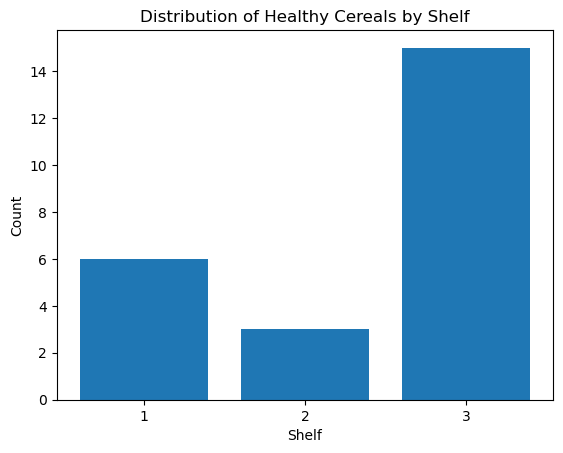

In [31]:
plt.bar(healthy_cereals_by_shelf.index, healthy_cereals_by_shelf.values)

# makig sure x ticks are integer
plt.xticks(healthy_cereals_by_shelf.index, map(int, healthy_cereals_by_shelf.index))


plt.xlabel('Shelf')
plt.ylabel('Count')
plt.title('Distribution of Healthy Cereals by Shelf')

# Display the plot
plt.show()

**Answer 10.**
* The majority of healthy cereals are typically found on the third shelf.

---

**Question 11.** _(1 point)_
* Based on the analysis conducted, what can you conclude about the cereal data set?

**Answer 11.**
* In conclusion, the dataset reveals interesting insights about the cereal products. Nabisco emerges as the prominent producer, with a significant share in the healthy cereal category. Healthy cereals, in general, receive higher ratings compared to unhealthy cereals, emphasizing the importance of nutritional quality. Wheat cereals and Bran cereals exhibit notable ratings, with Crunch cereals having the lowest ratings. Kellogg's and General Mills stand out as manufacturers offering a diverse range of cereal types. Calorie content appears to influence the ratings, as lower-calorie cereals tend to receive higher ratings and are considered healthier. Overall, the dataset provides valuable information for understanding the composition, ratings, and health status of various cereal products.